In [3]:
import pandas as pd
import requests
import GetDestinationCoordinates as gpscoordinates
import GetWeatherForecast as weatherforecast
import ScrapingBooking as hotelsearch

import os
from pathlib import Path
import sys

import asyncio

from datetime import date, datetime, timedelta
from typing import TypedDict, List

import boto3

output_subdir :  C:\Pieric\datascience\JEDHA\Data Science Fundamentals\PYTHON\workspace\projects\jedha-dts-data-collect-mgmt-kayak\data\output


### Setting secrets ###

In [ ]:
import os
import ipywidgets as widgets
from IPython.display import display

access_key = widgets.Password(description="AWS Key:")
secret_key = widgets.Password(description="AWS Secret:")
weatherforecats_api_key = widgets.Password(description="OpenWeather map api key:")
rds_postgresql_kayak_uri = widgets.Password(description="Rds postgresql kayak db URI:")

display(access_key, secret_key,weatherforecats_api_key )

def set_env(_):
    os.environ["AWS_ACCESS_KEY_ID"] = access_key.value
    os.environ["AWS_SECRET_ACCESS_KEY"] = secret_key.value
    os.environ["OPENWEATHER_API_KEY"] = weatherforecats_api_key.value
    os.environ["RDS_KAYAK_POSTGRESQL_URI"] = rds_postgresql_kayak_uri.value
    os.environ["AWS_DEFAULT_REGION"] = "eu-west-3"

button = widgets.Button(description="Set secrets")
button.on_click(set_env)
display(button)

Password(description='AWS Key:')

Password(description='AWS Secret:')

Button(description='Set AWS Credentials', style=ButtonStyle())

In [138]:
current_folder_path = os.getcwd()
destinations_input_info_list = [{'destination_key':'Mont Saint Michel','destination_q':'Mont Saint Michel, France, 50170', 'address_type':'tourism'}
                                ,{'destination_key':'Saint-Malo','destination_q':'Saint Malo, France, 35400','address_type':'town'}
                                ,{'destination_key':'Bayeux','destination_q':'Bayeux, France','address_type':'town'}
                                ,{'destination_key':'Le Havre','destination_q':'Le Havre, France, 76600','address_type':'city'}
                                ,{'destination_key':'Rouen','destination_q':'Rouen, France','address_type':'city'}
                                ,{'destination_key':'Paris','destination_q':'Paris, France','address_type':'city'}
                                ,{'destination_key':'Amiens','destination_q':'Amiens, France, 80000','address_type':'city'}
                                ,{'destination_key':'Lille','destination_q':'Lille, France, 59000','address_type':'city'}
                                ,{'destination_key':'Strasbourg','destination_q':'Strasbourg, France, 67000','address_type':'city'}
                                ,{'destination_key':'Château du Haut Koenigsbourg','destination_q':'Château du Haut Koenigsbourg, France','address_type':'historic'}
                                ,{'destination_key':'Colmar','destination_q':'Colmar, France, 68000','address_type':'town'}
                                ,{'destination_key':'Eguisheim','destination_q':'Eguisheim, France','address_type':'city'}
                                ,{'destination_key':'Besancon','destination_q':'Besancon, France, 25000','address_type':'city'}
                                ,{'destination_key':'Dijon','destination_q':'Dijon, France, 21000','address_type':'city'}
                                ,{'destination_key':'Annecy','destination_q':'Annecy, France, 74000','address_type':'city'}
                                ,{'destination_key':'Grenoble','destination_q':'Grenoble, France, 38000','address_type':'city'}
                                ,{'destination_key':'Lyon','destination_q':'Lyon, France, 69000','address_type':'city'}
                                ,{'destination_key':'Gorges du Verdon','destination_q':'Gorges du Verdon, France','address_type':'tourism'}
                                ,{'destination_key':'Bormes les Mimosas','destination_q':'Bormes les Mimosas, France; 83230','address_type':'city'}
                                ,{'destination_key':'Cassis','destination_q':'Cassis, France, 13260','address_type':'city'}
                                ,{'destination_key':'Marseille','destination_q':'Marseille, France, 13001','address_type':'city'}
                                ,{'destination_key':'Aix en Provence','destination_q':'Aix en Provence, France','address_type':'city'}
                                ,{'destination_key':'Avignon','destination_q':'Avignon, France, 84000','address_type':'city'}
                                ,{'destination_key':'Uzes','destination_q':'Uzes, France, 30700','address_type':'city'}
                                ,{'destination_key':'Nimes','destination_q':'Nimes, France, 30000','address_type':'city'}
                                ,{'destination_key':'Aigues Mortes','destination_q':'Aigues-Mortes, France','address_type':'tourism'}
                                ,{'destination_key':'Saintes Maries de la mer','destination_q':'Saintes Maries de la mer, France','address_type':'city'}
                                ,{'destination_key':'Collioure','destination_q':'Collioure, France, 66190','address_type':'city'}
                                ,{'destination_key':'Carcassonne','destination_q':'Carcassonne, France, 11000','address_type':'city'}
                                ,{'destination_key':'Ariege','destination_q':'Ariege, France','address_type':'city'}
                                ,{'destination_key':'Toulouse','destination_q':'Toulouse, France, 31000','address_type':'city'}
                                ,{'destination_key':'Montauban','destination_q':'Montauban, France, 82000','address_type':'city'}
                                ,{'destination_key':'Biarritz','destination_q':'Biarritz, France, 64200','address_type':'city'}
                                ,{'destination_key':'Bayonne','destination_q':'Bayonne, France, 64100','address_type':'city'}
                                ,{'destination_key':'La Rochelle','destination_q':'La Rochelle, France, 17300','address_type':'city'}                               
                                ]

user_agent = 'Edg/129.0.2792.79'
print('ok')

ok


In [139]:
def remove_file_if_exists(relative_path:str):
    if os.path.exists(relative_path):
          os.remove(relative_path)

### Load gps coordinates of destinations ###

In [4]:
getcoordinates = gpscoordinates.GetDestinationCoordinates(user_agent)
dest_coordinates_dtf =  getcoordinates.get_destination_gpscoordinates_dataframe(destinations_input_info_list)
dest_coordinates_dtf.head(5)

Response Status code : 200, parameters : {'format': 'jsonv2', 'q': 'Mont Saint Michel, France, 50170'}
No entry matching address_type for destination key :  Mont Saint Michel
take first entry, addesstype :  highway
Response Status code : 200, parameters : {'format': 'jsonv2', 'q': 'Saint Malo, France, 35400'}
Response Status code : 200, parameters : {'format': 'jsonv2', 'q': 'Bayeux, France'}
Response Status code : 200, parameters : {'format': 'jsonv2', 'q': 'Le Havre, France, 76600'}
Response Status code : 200, parameters : {'format': 'jsonv2', 'q': 'Rouen, France'}
Response Status code : 200, parameters : {'format': 'jsonv2', 'q': 'Paris, France'}
Response Status code : 200, parameters : {'format': 'jsonv2', 'q': 'Amiens, France, 80000'}
Response Status code : 200, parameters : {'format': 'jsonv2', 'q': 'Lille, France, 59000'}
Response Status code : 200, parameters : {'format': 'jsonv2', 'q': 'Strasbourg, France, 67000'}
Response Status code : 200, parameters : {'format': 'jsonv2', '

,destination_id,destination_key,destination,gps_long,gps_lat
0,1,Mont Saint Michel,Mont Saint-Michel,-1.5070125,48.6095263
1,2,Saint-Malo,Saint-Malo,-2.0260409,48.6495180
2,3,Bayeux,Bayeux,-0.7024738,49.2764624
3,4,Le Havre,Le Havre,0.1079732,49.4938975
4,5,Rouen,Rouen,1.0939658,49.4404591


In [109]:
dest_coordinates_dtf.dtypes

destination_id       int64
destination_key     object
destination         object
gps_long           float64
gps_lat            float64
dtype: object

### Save gps coordinates dataframe to csv ###

In [5]:
# Save dataset as csv
output_file_path = 'data/output/destination_gps_coordinates.csv'
if os.path.exists(output_file_path):
    print(f'The file "{output_file_path}" exists.')
    remove_file_if_exists(output_file_path)
else:
    print(f'The file "{output_file_path}" does not exist.')
dest_coordinates_dtf.to_csv(output_file_path, encoding='utf-8',sep=',',index = False)

The file "data/output/destination_gps_coordinates.csv" exists.


#### OPTIONAL (read gps coordinates dataset back from csv ) ####

In [140]:
output_file_path = 'data/output/destination_gps_coordinates.csv'
dest_coordinates_dtf = pd.read_csv(output_file_path, encoding='utf-8',sep=',')
dest_coordinates_dtf.head(5)

,destination_id,destination_key,destination,gps_long,gps_lat
0,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526
1,2,Saint-Malo,Saint-Malo,-2.026041,48.649518
2,3,Bayeux,Bayeux,-0.702474,49.276462
3,4,Le Havre,Le Havre,0.107973,49.493898
4,5,Rouen,Rouen,1.093966,49.440459


### Get 5-days weather forecasts for destinations ###

In [ ]:
# First create list of dict with keys matching get_weather_forecasts dict keys
destinations_coordinates_input_dict = dest_coordinates_dtf.rename(columns={'gps_long':'lon', 'gps_lat':'lat'})[['destination_id', 'destination', 'lon', 'lat']].to_dict('records')
getweatherforecast = weatherforecast.GetWeatherForecast(user_agent)
weather_forecasts_dtf = getweatherforecast.get_weather_forecasts(destinations_coordinates_input_dict)
weather_forecasts_dtf.head(5)

Response Status code : 200, parameters : {'units': 'metric', 'lon': '-1.5070125', 'lat': '48.6095263'}
Response Status code : 200, parameters : {'units': 'metric', 'lon': '-2.0260409', 'lat': '48.6495180'}
Response Status code : 200, parameters : {'units': 'metric', 'lon': '-0.7024738', 'lat': '49.2764624'}
Response Status code : 200, parameters : {'units': 'metric', 'lon': '0.1079732', 'lat': '49.4938975'}
Response Status code : 200, parameters : {'units': 'metric', 'lon': '1.0939658', 'lat': '49.4404591'}
Response Status code : 200, parameters : {'units': 'metric', 'lon': '2.3483915', 'lat': '48.8534951'}
Response Status code : 200, parameters : {'units': 'metric', 'lon': '2.2956951', 'lat': '49.8941708'}
Response Status code : 200, parameters : {'units': 'metric', 'lon': '3.0635282', 'lat': '50.6365654'}
Response Status code : 200, parameters : {'units': 'metric', 'lon': '7.7507127', 'lat': '48.5846140'}
Response Status code : 200, parameters : {'units': 'metric', 'lon': '7.3443202'

,destination_id,destination,dt_txt,dt,temp,temp_min,temp_max,pressure,humidity,weather_main,weather_descr,clouds_info_dict,pop
0,1,Moidrey,2025-09-04 15:00:00,1756998000,20.05,19.67,20.05,1011,58,Rain,light rain,{'all': 58},0.2
1,1,Moidrey,2025-09-04 18:00:00,1757008800,18.09,17.01,18.09,1013,69,Rain,light rain,{'all': 58},1.0
2,1,Moidrey,2025-09-04 21:00:00,1757019600,13.47,13.47,13.47,1017,89,Rain,light rain,{'all': 75},1.0
3,1,Moidrey,2025-09-05 00:00:00,1757030400,12.21,12.21,12.21,1018,91,Rain,light rain,{'all': 51},1.0
4,1,Moidrey,2025-09-05 03:00:00,1757041200,11.60,11.60,11.60,1019,92,Clouds,few clouds,{'all': 16},0.0


#### Check dataframe ####

In [7]:
weather_forecasts_dtf.groupby('destination').head(5).reset_index()

,index,destination_id,destination,dt_txt,dt,temp,temp_min,temp_max,pressure,humidity,weather_main,weather_descr,clouds_info_dict,pop
0,0,1,Moidrey,2025-09-04 15:00:00,1756998000,20.05,19.67,20.05,1011,58,Rain,light rain,{'all': 58},0.20
1,1,1,Moidrey,2025-09-04 18:00:00,1757008800,18.09,17.01,18.09,1013,69,Rain,light rain,{'all': 58},1.00
2,2,1,Moidrey,2025-09-04 21:00:00,1757019600,13.47,13.47,13.47,1017,89,Rain,light rain,{'all': 75},1.00
3,3,1,Moidrey,2025-09-05 00:00:00,1757030400,12.21,12.21,12.21,1018,91,Rain,light rain,{'all': 51},1.00
4,4,1,Moidrey,2025-09-05 03:00:00,1757041200,11.60,11.60,11.60,1019,92,Clouds,few clouds,{'all': 16},0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1360,35,La Rochelle,2025-09-04 15:00:00,1756998000,21.60,20.67,21.60,1015,61,Clouds,scattered clouds,{'all': 50},0.00
171,1361,35,La Rochelle,2025-09-04 18:00:00,1757008800,20.14,19.17,20.14,1016,69,Rain,light rain,{'all': 25},0.20
172,1362,35,La Rochelle,2025-09-04 21:00:00,1757019600,16.31,16.31,16.31,1020,79,Rain,light rain,{'all': 2},1.00
173,1363,35,La Rochelle,2025-09-05 00:00:00,1757030400,15.06,15.06,15.06,1021,78,Rain,light rain,{'all': 3},0.81


#### Rename weather forecast destination values with dest_coordinates destination values mapped to destination_id ####
#### in order to have same destination names accross all datasets ####

#### Convert dt column to datetime ####

In [ ]:
#update weather forecast destination values with dest_coordinates destination name values mapped to destination_id
destination_id_to_name_mapping = dict(zip(dest_coordinates_dtf['destination_id'],dest_coordinates_dtf['destination'] ))
weather_forecasts_dtf['destination']= weather_forecasts_dtf['destination_id'].map(destination_id_to_name_mapping)
weather_forecasts_dtf['dt'] = pd.to_datetime(weather_forecasts_dtf['dt'], unit='s')
# remove dt_txt column
weather_forecasts_dtf.drop(['dt_txt'], axis=1, inplace=True)
weather_forecasts_dtf.head(5)

,destination_id,destination,dt,temp,temp_min,temp_max,pressure,humidity,weather_main,weather_descr,clouds_info_dict,pop
0,1,Mont Saint-Michel,2025-09-04 15:00:00,20.05,19.67,20.05,1011,58,Rain,light rain,{'all': 58},0.2
1,1,Mont Saint-Michel,2025-09-04 18:00:00,18.09,17.01,18.09,1013,69,Rain,light rain,{'all': 58},1.0
2,1,Mont Saint-Michel,2025-09-04 21:00:00,13.47,13.47,13.47,1017,89,Rain,light rain,{'all': 75},1.0
3,1,Mont Saint-Michel,2025-09-05 00:00:00,12.21,12.21,12.21,1018,91,Rain,light rain,{'all': 51},1.0
4,1,Mont Saint-Michel,2025-09-05 03:00:00,11.60,11.60,11.60,1019,92,Clouds,few clouds,{'all': 16},0.0


In [9]:
weather_forecasts_dtf.dtypes

destination_id               int64
destination                 object
dt                  datetime64[ns]
temp                       float64
temp_min                   float64
temp_max                   float64
pressure                     int64
humidity                     int64
weather_main                object
weather_descr               object
clouds_info_dict            object
pop                        float64
dtype: object

In [10]:
# save dataset as csv
output_file_path = 'data/output/destination_weatherforecasts.csv'
remove_file_if_exists(output_file_path)
weather_forecasts_dtf.to_csv(output_file_path, encoding='utf-8',sep=',',index = False)
#output_dtf = weather_forecasts_dtf.loc[(weather_forecasts_dtf['dt'] - pd.Timestamp.now().replace(hour=0, minute=0, second=0, microsecond=0)).dt.days<=DAYS_OFFSET_MAX,: ]

#### OPTIONAL (read weather forecast dataset back from csv ) ####

In [141]:
output_file_path = 'data/output/destination_weatherforecasts.csv'
weather_forecasts_dtf = pd.read_csv(output_file_path, encoding='utf-8',sep=',', parse_dates=["dt"])
weather_forecasts_dtf.head(5)

,destination_id,destination,dt,temp,temp_min,temp_max,pressure,humidity,weather_main,weather_descr,clouds_info_dict,pop
0,1,Mont Saint-Michel,2025-09-04 15:00:00,20.05,19.67,20.05,1011,58,Rain,light rain,{'all': 58},0.2
1,1,Mont Saint-Michel,2025-09-04 18:00:00,18.09,17.01,18.09,1013,69,Rain,light rain,{'all': 58},1.0
2,1,Mont Saint-Michel,2025-09-04 21:00:00,13.47,13.47,13.47,1017,89,Rain,light rain,{'all': 75},1.0
3,1,Mont Saint-Michel,2025-09-05 00:00:00,12.21,12.21,12.21,1018,91,Rain,light rain,{'all': 51},1.0
4,1,Mont Saint-Michel,2025-09-05 03:00:00,11.60,11.60,11.60,1019,92,Clouds,few clouds,{'all': 16},0.0


In [11]:
weather_forecasts_dtf.dtypes

destination_id               int64
destination                 object
dt                  datetime64[ns]
temp                       float64
temp_min                   float64
temp_max                   float64
pressure                     int64
humidity                     int64
weather_main                object
weather_descr               object
clouds_info_dict            object
pop                        float64
dtype: object

### Compute weather forecast start date and end date ###

#### This will drive the booking start date and end date input parameters ####

In [142]:
#weather_forecasts_dtf['weather_main'].unique()
weather_forecast_start_date = weather_forecasts_dtf['dt'].min().replace(hour=0, minute=0, second=0, microsecond=0)
weather_forecast_end_date = weather_forecasts_dtf['dt'].max().replace(hour=0, minute=0, second=0, microsecond=0)
#weather_forecast_end_date = weather_forecast_start_date + timedelta(days=7)
print(f'weather_forecast_start_date : {weather_forecast_start_date}')
print(f'weather_forecast_end_date : {weather_forecast_end_date}')

DAYS_OFFSET_MAX = (weather_forecast_end_date - weather_forecast_start_date).days

print(f'DAYS_OFFSET_MAX : {DAYS_OFFSET_MAX}')

weather_forecast_start_date : 2025-09-04 00:00:00
weather_forecast_end_date : 2025-09-09 00:00:00
DAYS_OFFSET_MAX : 5


#### Compute top destinations based on best* weather forecasts score ####

In [143]:
''' *
for each weather forecast (row) we define an arbitrary score based on weather_main considering Clear sky is the best score
then 2 aggregations are defined for each destination
1. median score (weather_median_score)
2. average temperature (avg_temp)
Then we compute a two-levels ranking based on 1 and 2 
'''

weather_main_score_mapping = {'Clear':10, 'Clouds':6, 'Mist':4, 'Snow':4, 'Rain':4, 'Thunderstorm':2}
weather_forecasts_dtf_copy = weather_forecasts_dtf.copy()
weather_forecasts_dtf_copy['weather_score'] = weather_forecasts_dtf_copy['weather_main'].map(weather_main_score_mapping).astype(int)
scores_by_destination_dtf = weather_forecasts_dtf_copy.loc[(weather_forecasts_dtf_copy['dt'] - weather_forecast_start_date).dt.days<=DAYS_OFFSET_MAX,: ].groupby(['destination_id','destination']).agg(weather_median_score=('weather_score','median'), avg_temp=('temp','mean'))
scores_by_destination_dtf.reset_index(inplace=True)
TOP_N_DESTINATION = 5
scores_by_destination_dtf.sort_values(['weather_median_score', 'avg_temp'], ascending = [False, False], inplace=True)
scores_by_destination_dtf['weather_rank'] = scores_by_destination_dtf[['weather_median_score', 'avg_temp']].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(int)
scores_by_destination_dtf.sort_values(['weather_rank'], ascending=[True],inplace=True)
top_destination_dtf = scores_by_destination_dtf.head(TOP_N_DESTINATION)
top_destination_dtf


,destination_id,destination,weather_median_score,avg_temp,weather_rank
21,22,Aix-en-Provence,6.0,23.56375,1
20,21,Marseille,6.0,23.53200,2
19,20,Cassis,6.0,22.65925,3
27,28,Collioure,6.0,22.52875,4
24,25,Nîmes,6.0,22.35475,5


#### Save weather metrics by destination ####

In [144]:
scores_by_destination_dtf.head(10)
# save dataset as csv
output_file_path = 'data/output/destination_weatherscores.csv'
remove_file_if_exists(output_file_path)
scores_by_destination_dtf.to_csv(output_file_path, encoding='utf-8',sep=',',index = False)

#### ALTERNATIVE - compute top destinations based on best median temperature ####

In [8]:
#top_destination_dtf[['destination_id', 'destination']].iloc[0].to_dict()
DAYS_OFFSET_MAX = 7
scores_by_destination_dtf = weather_forecasts_dtf.loc[(weather_forecasts_dtf['dt'] - weather_forecast_start_date).dt.days<=DAYS_OFFSET_MAX,: ].groupby(['destination_id','destination']).agg(median_temp=('temp','median'))
scores_by_destination_dtf.reset_index(inplace=True)
TOP_N_DESTINATION = 5
scores_by_destination_dtf.sort_values(['median_temp'], ascending = [False], inplace=True)
scores_by_destination_dtf['weather_rank'] = scores_by_destination_dtf[['median_temp']].apply(tuple,axis=1).rank(method='dense',ascending=False).astype(int)
top_destination_dtf = scores_by_destination_dtf.head(TOP_N_DESTINATION)
top_destination_dtf

,destination_id,destination,median_temp,weather_rank
20,21,Marseille,24.040,1
21,22,Aix-en-Provence,23.480,2
19,20,Cassis,23.250,3
27,28,Collioure,22.205,4
26,27,Saintes-Maries-de-la-Mer,22.145,5


#### add destination coordinates (merge) to top destination dataframe ####

In [145]:
top_destination_dtf = pd.merge(left=top_destination_dtf, right=dest_coordinates_dtf, on='destination_id', how='left')
top_destination_dtf.drop(['destination_y'], axis=1, inplace=True)
top_destination_dtf.rename(columns={'destination_x':'destination'}, inplace=True)
top_destination_dtf.head(5)

,destination_id,destination,weather_median_score,avg_temp,weather_rank,destination_key,gps_long,gps_lat
0,22,Aix-en-Provence,6.0,23.56375,1,Aix en Provence,5.447474,43.529842
1,21,Marseille,6.0,23.53200,2,Marseille,5.369953,43.296174
2,20,Cassis,6.0,22.65925,3,Cassis,5.539632,43.214036
3,28,Collioure,6.0,22.52875,4,Collioure,3.083155,42.525050
4,25,Nîmes,6.0,22.35475,5,Nimes,4.360069,43.837425


In [146]:
top_destination_dtf['gps_long']= top_destination_dtf['gps_long'].astype(float)
top_destination_dtf['gps_lat'] = top_destination_dtf['gps_lat'].astype(float)
top_destination_dtf.dtypes

destination_id            int64
destination              object
weather_median_score    float64
avg_temp                float64
weather_rank              int32
destination_key          object
gps_long                float64
gps_lat                 float64
dtype: object

#### Plot top destination in a map ####

In [147]:
import plotly.express as px
# play with the color: continous/numerical
#px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(top_destination_dtf, lat="gps_lat", lon="gps_long", color="weather_rank", text='destination', 
#                         size="hour",
                        #color_continuous_scale=px.colors.cyclical.IceFire,   
                        color_continuous_scale="RdYlGn_r",                     
                        zoom=4.5,
                       width=900,
                        height=600,
                        labels={'median_temp' : 'median temperature'},
                        title='Top 5 destinations ' + weather_forecast_start_date.strftime("%d-%m-%Y") + ' to ' + weather_forecast_end_date.strftime("%d-%m-%Y"))
fig.update_traces(marker=dict(size=20))
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
fig.write_image("kayak_top5destinations.png")

### Collect (scrap) booking hotels available for ALL destinations ###

In [ ]:
hotel_scrapping_search_result_filename = 'booking_hotels.csv'
booking_queries = list()
checkin_date = date.today() + timedelta(days=1)
checkout_date = checkin_date + timedelta(days=DAYS_OFFSET_MAX)
for i in range(len(dest_coordinates_dtf)):
    destination_query_parameters = dest_coordinates_dtf[['destination_id', 'destination']].iloc[i].to_dict()
    destination_query_parameters.update({'destination_country':'France', 'destination_type':'city'
                                              ,'checkin_date': checkin_date,'checkout_date':checkout_date
                                              ,'group_adults':2, 'group_children':0 })
    booking_queries.append(destination_query_parameters)

output_file = hotelsearch.scrap(booking_queries, filename=hotel_scrapping_search_result_filename)
print("Results saved to:", output_file)

df = pd.read_csv(output_file)
df.head()

### ALTERNATIVE - Collect (scrap) booking hotels available for the top destinations ###

#### Booking.com may limit queries and search results - Limiting scraping to top 5 destinations gives more chance to retrieve full search results hotels ####

In [ ]:
'''
get top n destinations and collect destinations hotels available between checkin_date and checkout_date

'''
hotel_scrapping_search_result_filename = 'booking_hotels_top_destinations.csv'
booking_queries = list()
checkin_date = date.today() + timedelta(days=1)
checkout_date = checkin_date + timedelta(days=DAYS_OFFSET_MAX)
for i in range(len(top_destination_dtf)):
    destination_query_parameters = top_destination_dtf[['destination_id', 'destination']].iloc[i].to_dict()
    destination_query_parameters.update({'destination_country':'France', 'destination_type':'city'
                                              ,'checkin_date': checkin_date,'checkout_date':checkout_date
                                              ,'group_adults':2, 'group_children':0 })
    booking_queries.append(destination_query_parameters)
output_file = hotelsearch.scrap(booking_queries=booking_queries,filename=hotel_scrapping_search_result_filename)
print("Results saved to:", output_file)

df = pd.read_csv(output_file)
df.head()

### Load booking hotels scraping output file ###

In [148]:
hotel_scrapping_search_result_filename = 'booking_hotels.csv'
output_file_path = hotelsearch.get_outputfile_path(hotel_scrapping_search_result_filename)
destination_hotels_dtf = pd.read_csv(output_file_path, encoding='utf-8',sep=',')
destination_hotels_dtf.sort_values(['destination_id', 'score'], ascending = [True, False], inplace=True)
#destination_hotels_dtf.head(10)
#destination_hotels_dtf.groupby('destination_id').aggregate(count=('hotel_name','count'))

#### Select Top-20 hotels for each of top-5 destinations ####

In [149]:
top_hotels_dtf  = destination_hotels_dtf[destination_hotels_dtf['destination_id'].isin(top_destination_dtf['destination_id'].unique())].copy()
top_hotels_dtf.fillna({'score':0}, inplace=True)
top_hotels_dtf['hotel_rank'] = top_hotels_dtf.groupby('destination_id')['score'].rank(method='first',ascending=False).astype(int)
top_hotels_dtf[(top_hotels_dtf['hotel_rank'] <= 20 )]
top_hotels_dtf.head(10)
#top_hotels_dtf.groupby('destination_id').aggregate(count=('hotel_name','count'))

,destination_id,hotel_name,url,gps_lat,gps_long,score,description,address,hotel_rank
851,20,Tropézia- Standing T4 Terrasse et Parking Cassis,https://www.booking.com/hotel/fr/tropezia-stan...,43.214698,5.538341,9.7,L’hébergement Tropézia- Standing T4 Terrasse e...,"7 Rue du Général Bonaparte, 13260 Cassis, France",1
861,20,Charmant studio au cœur de Cassis,https://www.booking.com/hotel/fr/charmant-stud...,43.215634,5.538448,9.4,L’hébergement en bord de mer Charmant studio a...,"34 Rue Adolphe Thiers, 13260 Cassis, France",2
866,20,Au cœur de Cassis,https://www.booking.com/hotel/fr/au-coeur-de-c...,43.214959,5.539961,9.4,L’hébergement Au cœur de Cassis vous accueille...,"34 Avenue Victor Hugo, 13260 Cassis, France",3
860,20,Appartement Centre ville Cassis,https://www.booking.com/hotel/fr/appartement-c...,43.215384,5.544588,9.3,L’hébergement Appartement Centre ville Cassis ...,"4 Avenue de Provence, 13260 Cassis, France",4
862,20,Cassis Lodges,https://www.booking.com/hotel/fr/cassis-lodges...,43.210412,5.522897,9.2,L’établissement Cassis Lodges vous accueille à...,"20bis Avenue Notre Dame, 13260 Cassis, France",5
475,20,Eden Cassis - Centre Ville 2 chbres - Wifi - Clim,https://www.booking.com/hotel/fr/eden-cassis-c...,43.214080,5.543129,9.0,L’hébergement Eden Cassis - Centre Ville 2 cha...,"6 Avenue du Professeur René Leriche, 13260 Cas...",6
849,20,Indigo,https://www.booking.com/hotel/fr/bleu-indigo.f...,43.216884,5.537542,9.0,"Offrant une vue sur la ville, l’hébergement In...",Résidence les Grands Pins Bt C 6 Rue Pierre Pu...,7
872,20,Le Perchoir de Cassis Cocoon,https://www.booking.com/hotel/fr/le-perchoir-d...,43.214689,5.539442,8.9,L’hébergement Le Perchoir de Cassis Cocoon se ...,"35 Avenue Victor Hugo, 13260 Cassis, France",8
874,20,L'ECHO DES FLOTS vue mer,https://www.booking.com/hotel/fr/echo-des-flot...,43.211916,5.530918,8.8,"Bénéficiant d’un emplacement en bord de mer, l...",3bis Avenue des Calanques résidence le Week En...,9
864,20,LE SEA SIDE - Ultra centre - Terrasse vue Mer ...,https://www.booking.com/hotel/fr/superbe-appar...,43.212899,5.538700,8.7,"Offrant une vue sur la mer, l’hébergement LE S...","3 Place Montmorin, 13260 Cassis, France",10


In [150]:
# play with the color: continous/numerical
#px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(top_hotels_dtf, lat="gps_lat", lon="gps_long", color="score", text='hotel_name',
#                         size="hour",
                        color_continuous_scale=px.colors.cyclical.IceFire,                        
                        zoom=4.5,
                       width=900,
                        height=600,
                        labels={'score' : 'hotel score'},
                        title='Top hotels ' + weather_forecast_start_date.strftime("%d-%m-%Y") + ' to ' + weather_forecast_end_date.strftime("%d-%m-%Y"))
fig.update_traces(marker=dict(size=20))
fig.update_layout(mapbox_style="open-street-map")
fig.show()

### Export csvs to S3 ###

In [ ]:
session = boto3.Session()

In [152]:
s3 = session.resource("s3")

In [153]:
bucket = s3.Bucket("pfe-kayak-bucket") 
print(type(bucket))

<class 'boto3.resources.factory.s3.Bucket'>


In [60]:
bucket.upload_file("data/output/destination_gps_coordinates.csv","csv/destination_gps_coordinates.csv")

In [61]:
bucket.upload_file("data/output/destination_weatherforecasts.csv","csv/destination_weatherforecasts.csv")

In [62]:
bucket.upload_file("data/output/booking_hotels.csv","csv/booking_hotels.csv")

In [6]:
bucket.upload_file("data/input/locations.csv","csv/locations.csv")

### Create single dataset joining data from primary datasets (destination coordinates, destination weather forecasts, destination_weather scores, destination hotels ) ###

In [154]:
joined_dtf = pd.merge(left=dest_coordinates_dtf, right=weather_forecasts_dtf, on='destination_id', how='left')
joined_dtf.drop(['destination_y'], axis=1, inplace=True)
joined_dtf.rename(columns={'destination_x':'destination'}, inplace=True)
joined_dtf.head(3)

,destination_id,destination_key,destination,gps_long,gps_lat,dt,temp,temp_min,temp_max,pressure,humidity,weather_main,weather_descr,clouds_info_dict,pop
0,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-04 15:00:00,20.05,19.67,20.05,1011,58,Rain,light rain,{'all': 58},0.2
1,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-04 18:00:00,18.09,17.01,18.09,1013,69,Rain,light rain,{'all': 58},1.0
2,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-04 21:00:00,13.47,13.47,13.47,1017,89,Rain,light rain,{'all': 75},1.0


In [155]:
intersection = set(destination_hotels_dtf['destination_id'].unique()).intersection(joined_dtf['destination_id'].unique())
print(intersection)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [156]:
joined_dtf = pd.merge(left=joined_dtf, right=scores_by_destination_dtf, on='destination_id', how='left')
joined_dtf.drop(['destination_y'], axis=1, inplace=True)
joined_dtf.rename(columns={'destination_x':'destination'}, inplace=True)
joined_dtf.head(5)

,destination_id,destination_key,destination,gps_long,gps_lat,dt,temp,temp_min,temp_max,pressure,humidity,weather_main,weather_descr,clouds_info_dict,pop,weather_median_score,avg_temp,weather_rank
0,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-04 15:00:00,20.05,19.67,20.05,1011,58,Rain,light rain,{'all': 58},0.2,6.0,18.166,30
1,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-04 18:00:00,18.09,17.01,18.09,1013,69,Rain,light rain,{'all': 58},1.0,6.0,18.166,30
2,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-04 21:00:00,13.47,13.47,13.47,1017,89,Rain,light rain,{'all': 75},1.0,6.0,18.166,30
3,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-05 00:00:00,12.21,12.21,12.21,1018,91,Rain,light rain,{'all': 51},1.0,6.0,18.166,30
4,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-05 03:00:00,11.60,11.60,11.60,1019,92,Clouds,few clouds,{'all': 16},0.0,6.0,18.166,30


In [157]:
joined_dtf = pd.merge(left=joined_dtf, right=destination_hotels_dtf, on='destination_id', how='left')
joined_dtf.rename(columns={'destination_id':'target_dest_id', 'destination_key':'target_dest_key', 'destination':'target_dest','gps_long_x':'target_dest_lon', 'gps_lat_x':'target_dest_lat'}, inplace=True)
joined_dtf.rename(columns={'url':'hotel_url', 'gps_lat_y':'hotel_lat', 'gps_long_y':'hotel_lon','score':'hotel_score', 'description':'hotel_descr', 'address':'hotel_address'}, inplace=True)
joined_dtf.head(2)

,target_dest_id,target_dest_key,target_dest,target_dest_lon,target_dest_lat,dt,temp,temp_min,temp_max,pressure,...,weather_median_score,avg_temp,weather_rank,hotel_name,hotel_url,hotel_lat,hotel_lon,hotel_score,hotel_descr,hotel_address
0,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-04 15:00:00,20.05,19.67,20.05,1011,...,6.0,18.166,30,Chez Stéphanie et Matthias !,https://www.booking.com/hotel/fr/chez-stephani...,48.599615,-1.421002,10.0,"Situé à Servon, l’hébergement Chez Stéphanie e...","18 Rue du Pont Morin, 50170 Servon, France"
1,1,Mont Saint Michel,Mont Saint-Michel,-1.507013,48.609526,2025-09-04 15:00:00,20.05,19.67,20.05,1011,...,6.0,18.166,30,Au Mont Chez Nous Jaccuzi et Sauna,https://www.booking.com/hotel/fr/26-route-de-l...,48.613455,-1.485872,9.5,"Proposant un salon commun, l’hébergement Au Mo...","26 Route de la Rive Ardevon, 50170 Pontorson, ..."


In [159]:
# save dataset as csv
output_file_path = 'data/output/booking-hotels_weatherforecasts.csv'
remove_file_if_exists(output_file_path)
joined_dtf.to_csv(output_file_path, encoding='utf-8',sep=',',index = False)

In [160]:
bucket.upload_file(output_file_path,"csv/booking-hotels_weatherforecasts.csv")

### Once Posgresql Database created in Amazon RDS (kayak databse) - transfert data to RDS database ###

In [ ]:
bucket = s3.Bucket("pfe-kayak-bucket") 
objs = list(bucket.objects.filter(Prefix='csv'))
for obj in objs:
    #print(obj.key)
    out_name = obj.key.split('/')[-1]
    print(obj.key)

bucket.download_file('csv/booking-hotels_weatherforecasts.csv', 'data/output/s3_booking-hotels_weatherforecasts.csv') 
 

In [164]:
input_file_path = 'data/output/s3_booking-hotels_weatherforecasts.csv'
s3_booking_hotels_weatherforecasts_dtf = pd.read_csv(input_file_path, encoding='utf-8',sep=',')
s3_booking_hotels_weatherforecasts_dtf.sort_values(['weather_rank', 'hotel_score'], ascending = [True, False], inplace=True)
s3_booking_hotels_weatherforecasts_dtf.head(2)

,target_dest_id,target_dest_key,target_dest,target_dest_lon,target_dest_lat,dt,temp,temp_min,temp_max,pressure,...,weather_median_score,avg_temp,weather_rank,hotel_name,hotel_url,hotel_lat,hotel_lon,hotel_score,hotel_descr,hotel_address
21000,22,Aix en Provence,Aix-en-Provence,5.447474,43.529842,2025-09-04 15:00:00,26.1,24.9,26.1,1015,...,6.0,23.56375,1,T3 Centre ville Aix-en-Provence,https://www.booking.com/hotel/fr/t3-centre-vil...,43.521985,5.453696,9.8,L’hébergement T3 Centre ville Aix-en-Provence ...,"Bat D 1er etage 29 Avenue Saint-Jérôme, 13100 ..."
21025,22,Aix en Provence,Aix-en-Provence,5.447474,43.529842,2025-09-04 18:00:00,23.9,22.5,23.9,1016,...,6.0,23.56375,1,T3 Centre ville Aix-en-Provence,https://www.booking.com/hotel/fr/t3-centre-vil...,43.521985,5.453696,9.8,L’hébergement T3 Centre ville Aix-en-Provence ...,"Bat D 1er etage 29 Avenue Saint-Jérôme, 13100 ..."


In [165]:
s3_booking_hotels_weatherforecasts_dtf.dtypes

target_dest_id            int64
target_dest_key          object
target_dest              object
target_dest_lon         float64
target_dest_lat         float64
dt                       object
temp                    float64
temp_min                float64
temp_max                float64
pressure                  int64
humidity                  int64
weather_main             object
weather_descr            object
clouds_info_dict         object
pop                     float64
weather_median_score    float64
avg_temp                float64
weather_rank              int64
hotel_name               object
hotel_url                object
hotel_lat               float64
hotel_lon               float64
hotel_score             float64
hotel_descr              object
hotel_address            object
dtype: object

In [ ]:
from sqlalchemy import create_engine, text

# Make sure psycopg2-binary is installed on the kernel / anaconda environment pip install psycopg2-binary
engine = create_engine(os.getenv("RDS_KAYAK_POSTGRESQL_URI"), echo=True)

In [ ]:
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

from sqlalchemy import Column, Integer, String, Float, Sequence, DateTime

class HotelWeatherForecasts(Base):
    __tablename__ = "booking_hotels_weatherforecasts"

    # Each field corresponds to a column in our DB table
    id = Column(Integer, Sequence('seq_hotels_weatherforecats_id', start=1, increment=1),primary_key=True)
    target_dest_id = Column(Integer)
    target_dest_key = Column(String)
    target_dest = Column(String)
    target_dest_lon  = Column(Float)
    target_dest_lat  = Column(Float)
    dt = Column(DateTime(timezone=True))
    temp = Column(Float)
    temp_min = Column(Float) 
    temp_max = Column(Float)
    pressure = Column(Integer)
    humidity = Column(Integer)
    weather_main = Column(String)
    weather_descr = Column(String)
    clouds_info_dict = Column(String)
    pop  = Column(Float)
    weather_median_score  = Column(Float)
    avg_temp  = Column(Float)
    weather_rank = Column(Integer)
    hotel_name  = Column(String)
    hotel_url  = Column(String)
    hotel_lat = Column(Float)
    hotel_lon = Column(Float)
    hotel_score  = Column(Float)
    hotel_descr  = Column(String)
    hotel_address = Column(String)

    def __repr__(self):
        return "<HotelWeatherForecasts(hotel weather forecast at ='{}', hotel name='{}', location='{}')>".format(self.dt, self.hotel_name, self.target_dest)

HotelWeatherForecasts.__table__.drop(engine,checkfirst=True)
Base.metadata.create_all(engine)

#### First truncate table ####

In [79]:
with engine.begin() as conn:
    conn.execute(text(f'TRUNCATE TABLE {HotelWeatherForecasts.__tablename__} RESTART IDENTITY CASCADE'))

2025-09-05 15:44:39,271 INFO sqlalchemy.engine.Engine BEGIN (implicit)


2025-09-05 15:44:39 [sqlalchemy.engine.Engine] INFO: BEGIN (implicit)


2025-09-05 15:44:39,276 INFO sqlalchemy.engine.Engine TRUNCATE TABLE booking_hotels_weatherforecasts RESTART IDENTITY CASCADE


2025-09-05 15:44:39 [sqlalchemy.engine.Engine] INFO: TRUNCATE TABLE booking_hotels_weatherforecasts RESTART IDENTITY CASCADE


2025-09-05 15:44:39,279 INFO sqlalchemy.engine.Engine [generated in 0.00346s] {}


2025-09-05 15:44:39 [sqlalchemy.engine.Engine] INFO: [generated in 0.00346s] {}


2025-09-05 15:44:39,435 INFO sqlalchemy.engine.Engine COMMIT


2025-09-05 15:44:39 [sqlalchemy.engine.Engine] INFO: COMMIT


#### Bulk insert dataframe rows into table ####

In [ ]:
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()
session.bulk_insert_mappings(HotelWeatherForecasts,s3_booking_hotels_weatherforecasts_dtf.to_dict('records'))
# Commit the results
session.commit()

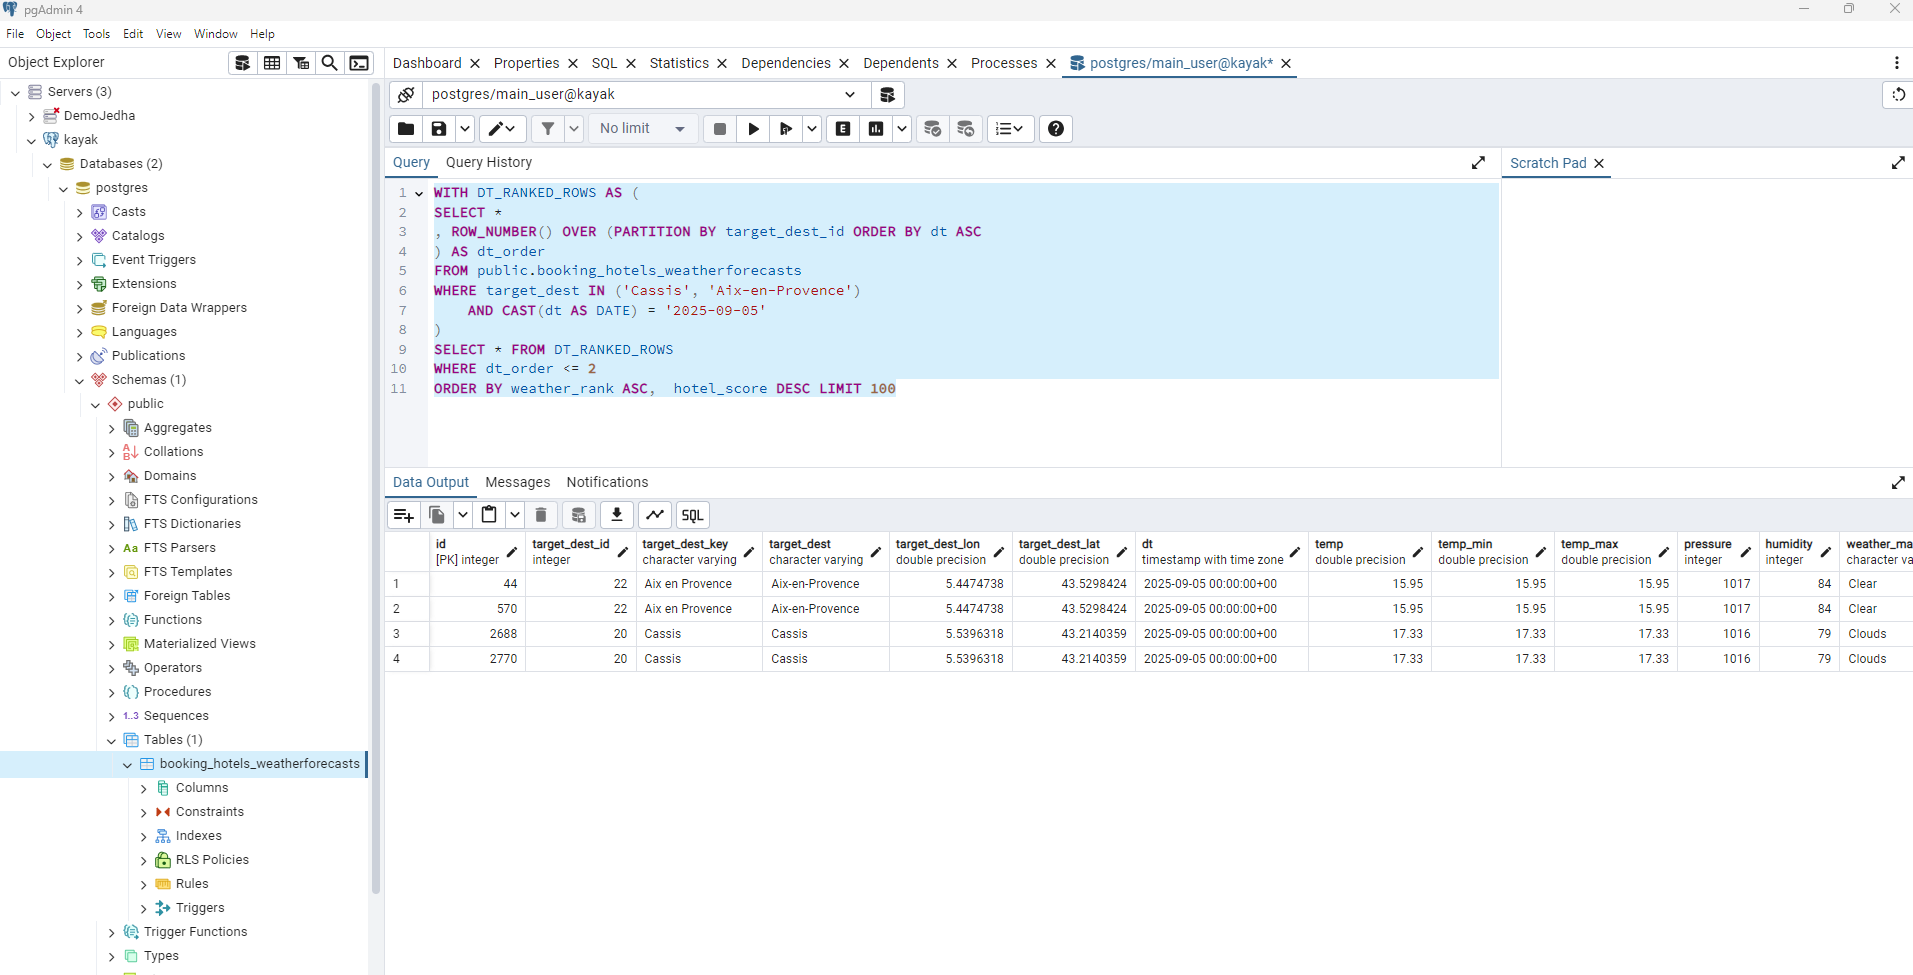

In [169]:
from IPython.display import Image, display

display(Image(filename="images/Query_RDS_Table_From_pgAdminClient.png"))   # Local file

WITH DT_RANKED_ROWS AS ( 

SELECT *

, ROW_NUMBER() OVER (PARTITION BY target_dest_id ORDER BY dt ASC

) AS dt_order

FROM public.booking_hotels_weatherforecasts

WHERE target_dest IN ('Cassis', 'Aix-en-Provence') 

	AND CAST(dt AS DATE) = '2025-09-05'

)

SELECT * FROM DT_RANKED_ROWS

WHERE dt_order <= 2

ORDER BY weather_rank ASC,  hotel_score DESC LIMIT 100